In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Dependencies

In [79]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [80]:
%pip install openai-cost-logger

Note: you may need to restart the kernel to use updated packages.


### 2. Imports

In [64]:
import os
import sys
import openai
import pathlib

# Add the src directory to the path
sys.path.insert(0, str(pathlib.Path('src')))

In [67]:
from openai_cost_logger import OpenAICostLogger
from openai_cost_logger import OpenAICostLoggerViz
from openai_cost_logger import OpenAICostLoggerUtils
from openai_cost_logger import DEFAULT_LOG_PATH, MODELS_COST

imported openai_cost_logger


### 3. Set API key environment variable

In [68]:
# Export the proper environment variables based on the client you are using.

# OpenAI API Key
os.environ["OPENAI_API_KEY"] = OpenAICostLoggerUtils.read_api_key(path='openai_api_key.txt')
os.environ["OPENAI_ORGANIZATION"] = OpenAICostLoggerUtils.read_api_key(path='openai_organization.txt')

### 4. Input Arguments

In [69]:
# The following demo is based on the standard OpenAI API client but it is easily adaptable for every client and model
# since the response generation is totally decoupled from the logging process (and is totally up to the user).
client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
experiment_name = "Demo"
cost_upperbound = 2
log_folder = DEFAULT_LOG_PATH

### 5. Demo

In [70]:
# Instantiate the OpenAICostLogger
cost_logger = OpenAICostLogger(
    experiment_name = experiment_name,
    log_folder = log_folder,
    cost_upperbound = cost_upperbound
)

In [71]:
# CHAT COMPLETION EXAMPLE
model = "gpt-3.5-turbo"
input_cost = MODELS_COST[model]["input"]
output_cost = MODELS_COST[model]["output"]
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the euro 2020?"},
]

# Get the model response
response = client.chat.completions.create(model=model, messages=messages, max_tokens=1, temperature=0)

# In case `input_cost` or `output_cost` are not passed, the object will look for the model in the `MODELS_COST` dictionary.
# If the model is not found, it will raise an exception.
# The costs should be per million tokens.
cost_logger.update_cost(response=response, input_cost=input_cost, output_cost=output_cost)

In [72]:
# EMBEDDINGS CREATION EXAMPLE
model = "text-embedding-ada-002"
input_cost = MODELS_COST[model]["input"]
output_cost = MODELS_COST[model]["output"]
messages = ["Once upon a time", "There was a frog"]

# In case `input_cost` or `output_cost` are not passed, the object will look for the model in the `MODELS_COST` dictionary.
# If the model is not found, it will raise an exception.
# The costs should be per million tokens.
response = client.embeddings.create(model=model, input=["Once upon a time", "There was a frog"])
cost_logger.update_cost(response=response, input_cost=input_cost, output_cost=output_cost)

**NOTE**:\
The above examples show the usage using `chat completion` and `embedding`. However, all the API endpoints are supported.\
The only strict requirements is that the model response contains the fields `usage.total_tokens` and `usage.prompt_tokens`.\
Be also aware that the `content` of the response is logged only for the `chat completion`.

### 6. Data Visualization

In [73]:
# Print the total cost
OpenAICostLoggerViz.print_total_cost(path=log_folder)

Total cost: 3e-05 (USD)


In [77]:
# Cost by model
OpenAICostLoggerViz.print_total_cost_by_model(path=log_folder)

gpt-3.5-turbo-0125: 2.8e-05 (USD)
text-embedding-ada-002: 2e-06 (USD)


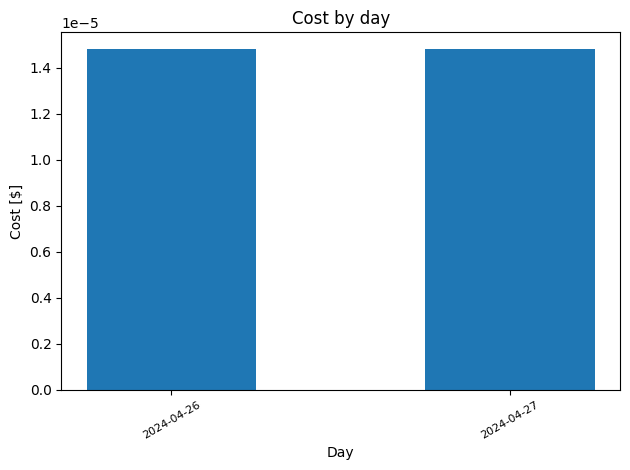

In [75]:
# Visualize the cost by day
OpenAICostLoggerViz.plot_cost_by_day(path=log_folder)